In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import ipywidgets as widgets

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
fileroute = 'data/VN_housing_dataset.csv'
data = pd.read_csv(fileroute)
data = data.drop(data.columns[0], axis = 1)
data = data.head(data.shape[0] - 1)
data = data.dropna()
data.reset_index(drop=True, inplace = True)
data


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
1,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52 m²,12 m,4.2 m,"93,27 triệu/m²"
2,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90 m²,18 m,5 m,"108,89 triệu/m²"
3,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32 m²,6.6 m,4.5 m,"60,94 triệu/m²"
4,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42 m²,11 m,4 m,"29,76 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
11468,2020-04-17,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37 m²,13 m,3 m,"43,24 triệu/m²"
11469,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100 m²,16 m,6 m,115 triệu/m²
11470,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Quận Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80 m²,14 m,5 m,"262,5 triệu/m²"
11471,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Quận Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89 m²,20 m,4 m,"258,43 triệu/m²"


In [6]:
data.describe()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
count,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473,11473
unique,84,4260,26,243,4,3,20,11,254,354,261,3230
top,2020-08-04,"Đường Khương Trung, Phường Khương Trung, Quận ...",Quận Hà Đông,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,40 m²,10 m,4 m,100 triệu/m²
freq,299,105,1623,314,8189,11304,4702,4067,943,2293,3966,310


In [7]:
result = data.dtypes
print(result)

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Dài                object
Rộng               object
Giá/m2             object
dtype: object


In [8]:
data['Diện tích'] = data['Diện tích'].astype(str).str.replace(' m²', '').str.strip()
data['Dài'] = data['Dài'].astype(str).str.replace(' m', '').str.strip()
data['Rộng'] = data['Rộng'].astype(str).str.replace(' m', '').str.strip()
data['Diện tích'] = pd.to_numeric(data['Diện tích'])
data['Dài'] = data['Dài'].astype(float)
data['Rộng'] = data['Rộng'].astype(float)
data['Ngày'] = pd.to_datetime(data['Ngày'])
data


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.00,10.00,4.00,65 triệu/m²
1,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52.00,12.00,4.20,"93,27 triệu/m²"
2,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90.00,18.00,5.00,"108,89 triệu/m²"
3,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32.00,6.60,4.50,"60,94 triệu/m²"
4,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42.00,11.00,4.00,"29,76 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
11468,2020-04-17,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37.00,13.00,3.00,"43,24 triệu/m²"
11469,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100.00,16.00,6.00,115 triệu/m²
11470,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Quận Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80.00,14.00,5.00,"262,5 triệu/m²"
11471,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Quận Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89.00,20.00,4.00,"258,43 triệu/m²"


In [9]:
data.rename(columns = {'Huyện': 'Phường'}, inplace = True)
data

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.00,10.00,4.00,65 triệu/m²
1,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52.00,12.00,4.20,"93,27 triệu/m²"
2,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90.00,18.00,5.00,"108,89 triệu/m²"
3,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32.00,6.60,4.50,"60,94 triệu/m²"
4,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42.00,11.00,4.00,"29,76 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
11468,2020-04-17,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37.00,13.00,3.00,"43,24 triệu/m²"
11469,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100.00,16.00,6.00,115 triệu/m²
11470,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Quận Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80.00,14.00,5.00,"262,5 triệu/m²"
11471,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Quận Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89.00,20.00,4.00,"258,43 triệu/m²"


# 1. Chuyển đổi đơn vị

In [10]:
data['Giá/m2'] = data['Giá/m2'].astype(str)
data.loc[data['Giá/m2'].str.contains(' triệu/m²', na=False), 'Giá/m2'] = data.loc[data['Giá/m2'].str.contains(' triệu/m²', na=False), 'Giá/m2'].str.replace(',', '.').str.replace(' triệu/m²', '').astype(float)
data.loc[data['Giá/m2'].str.contains(' tỷ/m²', na=False), 'Giá/m2'] = data.loc[data['Giá/m2'].str.contains(' tỷ/m²', na=False), 'Giá/m2' ].str.replace(',', '.').str.replace('.','').str.replace(' tỷ/m²', '').astype(float) * 1000
data.loc[data['Giá/m2'].str.contains(' đ/m²', na=False), 'Giá/m2'] = data.loc[data['Giá/m2'].str.contains(' đ/m²', na=False), 'Giá/m2'].str.replace('.', '').str.replace(' đ/m²', '').astype(float) * 0.000001
data['Giá/m2'] = data['Giá/m2'].astype(float)
data

/var/folders/pk/8rlgpdj91n758py0xr2qc01h0000gn/T/ipykernel_16214/1484810042.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.loc[data['Giá/m2'].str.contains(' tỷ/m²', na=False), 'Giá/m2'] = data.loc[data['Giá/m2'].str.contains(' tỷ/m²', na=False), 'Giá/m2' ].str.replace(',', '.').str.replace('.','').str.replace(' tỷ/m²', '').astype(float) * 1000
/var/folders/pk/8rlgpdj91n758py0xr2qc01h0000gn/T/ipykernel_16214/1484810042.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.loc[data['Giá/m2'].str.contains(' đ/m²', na=False), 'Giá/m2'] = data.loc[data['Giá/m2'].str.contains(' đ/m²', na=False), 'Giá/m2'].str.replace('.', '').str.replace(' đ/m²', '').astype(float) * 0.

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.00,10.00,4.00,65.00
1,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52.00,12.00,4.20,93.27
2,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90.00,18.00,5.00,108.89
3,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32.00,6.60,4.50,60.94
4,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42.00,11.00,4.00,29.76
...,...,...,...,...,...,...,...,...,...,...,...,...
11468,2020-04-17,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37.00,13.00,3.00,43.24
11469,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100.00,16.00,6.00,115.00
11470,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Quận Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80.00,14.00,5.00,262.50
11471,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Quận Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89.00,20.00,4.00,258.43


In [11]:
data['Giá/m2'].describe()

count                11,473.00
mean         27,592,953,222.63
std       2,185,478,073,552.44
min                       0.05
25%                      70.31
50%                      90.00
75%                     115.56
max     222,222,220,022,000.00
Name: Giá/m2, dtype: float64

In [12]:
data['Diện tích'].describe()

count   11,473.00
mean        55.05
std        451.61
min          1.00
25%         34.00
50%         40.00
75%         52.00
max     40,000.00
Name: Diện tích, dtype: float64

In [13]:
res = data.dtypes
print(res)

Ngày               datetime64[ns]
Địa chỉ                    object
Quận                       object
Phường                     object
Loại hình nhà ở            object
Giấy tờ pháp lý            object
Số tầng                    object
Số phòng ngủ               object
Diện tích                 float64
Dài                       float64
Rộng                      float64
Giá/m2                    float64
dtype: object


# 2. Loại bỏ  các giá trị outliers



Diện tích nhà ở

In [14]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
new_data = remove_outlier(data, 'Giá/m2')
print(data.shape)
print(new_data.shape)


(11473, 12)
(10478, 12)


In [15]:
res = new_data['Giá/m2'].describe()
print(res)

count   10,478.00
mean        90.48
std         32.24
min          2.71
25%         69.71
50%         87.07
75%        107.14
max        183.33
Name: Giá/m2, dtype: float64


In [16]:
res = new_data['Diện tích'].describe()
print(res)

count   10,478.00
mean        47.04
std         39.24
min          8.00
25%         33.00
50%         40.00
75%         50.00
max      1,900.00
Name: Diện tích, dtype: float64


In [17]:
data_type = new_data.dtypes
print(data_type)

Ngày               datetime64[ns]
Địa chỉ                    object
Quận                       object
Phường                     object
Loại hình nhà ở            object
Giấy tờ pháp lý            object
Số tầng                    object
Số phòng ngủ               object
Diện tích                 float64
Dài                       float64
Rộng                      float64
Giá/m2                    float64
dtype: object


In [18]:
new_data

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.00,10.00,4.00,65.00
1,2020-08-05,"Đường Bồ Đề, Phường Bồ Đề, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,52.00,12.00,4.20,93.27
2,2020-08-04,"Đường Tố Hữu, Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,"Nhà mặt phố, mặt tiền",Đã có sổ,5,5 phòng,90.00,18.00,5.00,108.89
3,2020-08-04,"180/61/5, Đường Tây Mỗ, Phường Tây Mỗ, Quận Na...",Quận Nam Từ Liêm,Phường Tây Mỗ,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,32.00,6.60,4.50,60.94
4,2020-08-04,"Đường Tả Thanh Oai, Xã Tả Thanh Oai, Huyện Tha...",Huyện Thanh Trì,Xã Tả Thanh Oai,"Nhà ngõ, hẻm",Đã có sổ,3,2 phòng,42.00,11.00,4.00,29.76
...,...,...,...,...,...,...,...,...,...,...,...,...
11464,2020-04-23,"Đường Phú Diễn, Phường Phú Diễn, Quận Bắc Từ L...",Quận Bắc Từ Liêm,Phường Phú Diễn,Nhà phố liền kề,Đang chờ sổ,4,4 phòng,73.00,14.00,5.00,72.60
11466,2020-04-21,"Đường Hoàng Văn Thái, Phường Khương Trung, Quậ...",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Đã có sổ,5,5 phòng,45.00,11.00,4.00,104.44
11468,2020-04-17,"101b-c4, ngõ 231, Đường Tân Mai, Phường Tân Ma...",Quận Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,2,2 phòng,37.00,13.00,3.00,43.24
11469,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100.00,16.00,6.00,115.00


# 2. Số lượng bất động sản được rao bán theo từng loại

In [53]:
count = new_data['Loại hình nhà ở'].value_counts()
count

Nhà ngõ, hẻm             7950
Nhà mặt phố, mặt tiền    2011
Nhà phố liền kề           359
Nhà biệt thự              158
Name: Loại hình nhà ở, dtype: int64

In [ ]:
df2.plot.pie(y=)

In [19]:
# Giá đất trung bình của Hà Nội
new_data['Giá/m2'].median()

87.07

In [20]:
# Hệ số tương quan giữa diện tích và giá đất theo m2
print(new_data['Diện tích'].corr(new_data['Giá/m2']))

-0.037800663639056306


Hệ số tương quan giữa diện tích và giá đất có giá trị âm, điều này được giải thích là giá đất càng cao thì diện tích càng nhỏ hoặc ngược lại, nếu diện tích càng lớn thì giá đất sẽ càng giảm

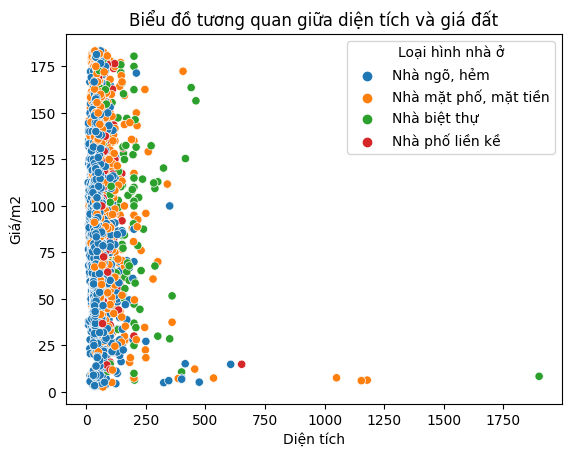

In [21]:
sns.scatterplot(data=new_data, x = 'Diện tích', y = 'Giá/m2', hue='Loại hình nhà ở')
plt.title('Biểu đồ tương quan giữa diện tích và giá đất')
plt.show()

1. Đa số nhà ngõ, hẻm ở Hà Nội có diện tích nhỏ, tuy nhiên một số nhà lại có giá đất rất cao, có khi lên đến hơn 150 triệu/m2
2. Tương tự như nhà ngõ, hẻm, nhà mặt phố và nhà phố liền kề đa số có diện tích vừa và nhỏ và giá đất cũng khá cao so với mặt bằng chung
3. Một số khu đất có diện tích rộng, thường từ 1000m2 trở lên, lại có giá nhà rẻ hơn so với mặt bằng chung, đa số dao động từ 10 tới 20 triệu/m2


# 4. Phân tích giá nhà theo từng quận, huyện

Để làm rõ mối tương quan giữa diện tích và giá đất, chúng ta tiến hành phân tích giá đất theo từng quận, huyện của Hà Nội

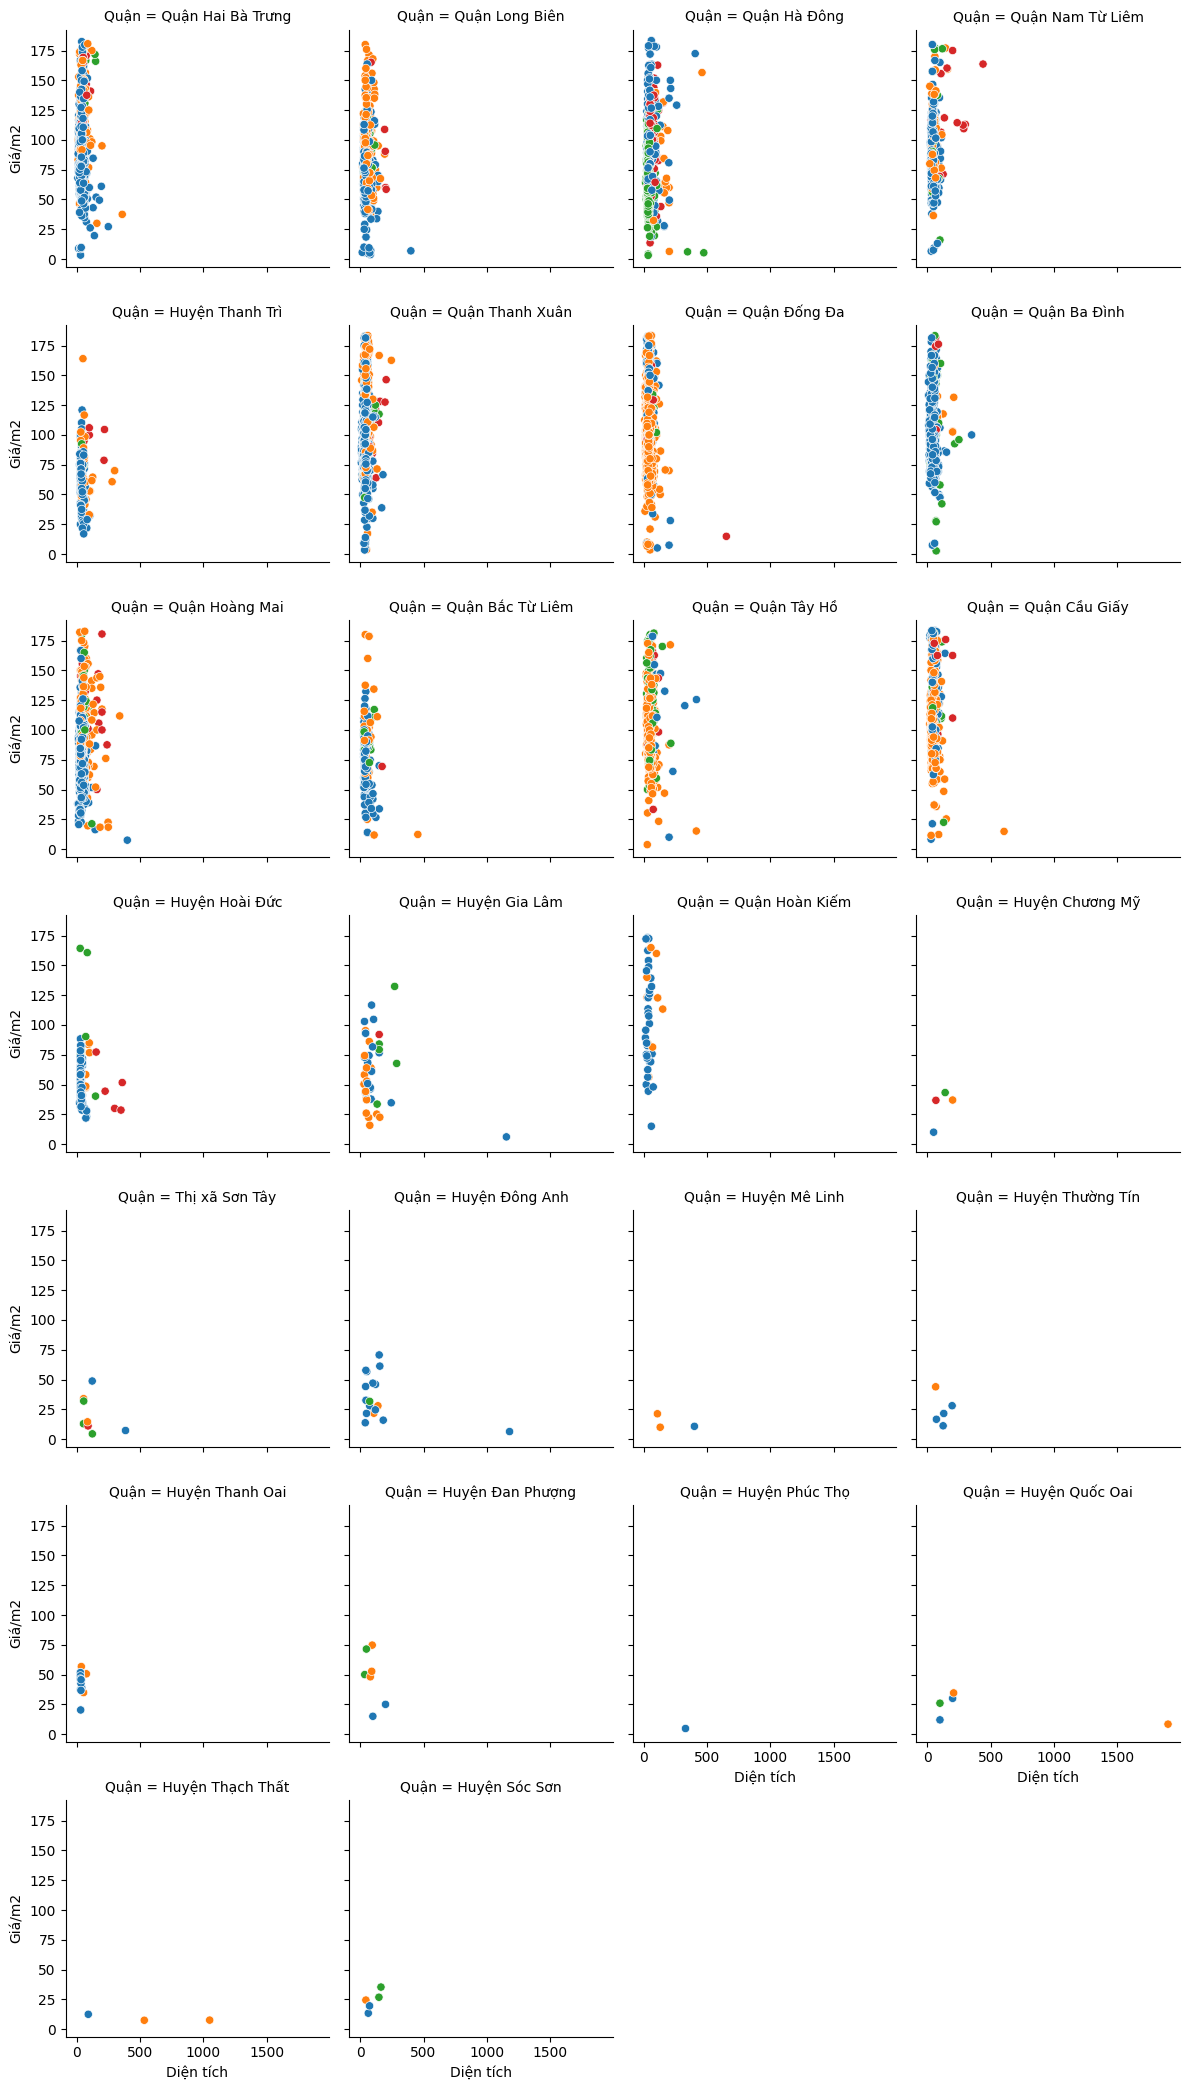

In [24]:
bieudo1 = sns.FacetGrid(new_data, col = 'Quận', col_wrap = 4)
bieudo1.map_dataframe(sns.scatterplot, 'Diện tích', 'Giá/m2', color = 'green', hue='Loại hình nhà ở')
plt.tight_layout()


1. Đa số các nhà ở nội thành chủ yếu là nhà ngõ, hẻm và 

In [48]:
df1 = new_data.groupby(['Quận'])['Giá/m2'].mean().to_frame().reset_index()
df1

,Quận,Giá/m2
0,Huyện Chương Mỹ,31.75
1,Huyện Gia Lâm,60.19
2,Huyện Hoài Đức,53.00
3,Huyện Mê Linh,14.02
4,Huyện Phúc Thọ,5.00
5,Huyện Quốc Oai,22.22
6,Huyện Sóc Sơn,23.93
7,Huyện Thanh Oai,43.88
8,Huyện Thanh Trì,62.82
9,Huyện Thường Tín,24.28


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Quận    26 non-null     object 
 1   Giá/m2  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


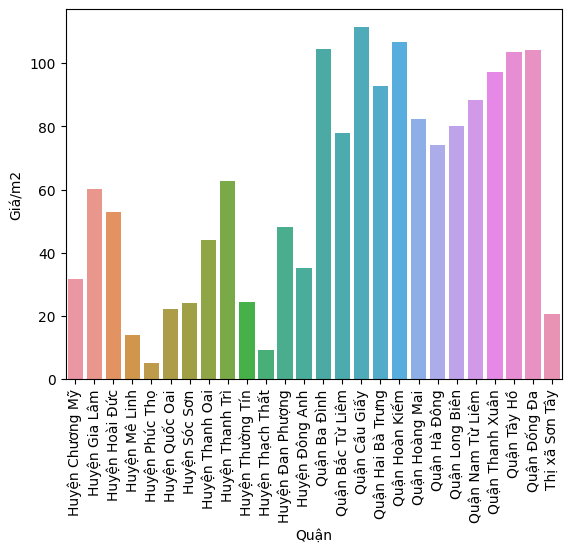

In [43]:
bieudo2 = sns.barplot(data = df1, x = 'Quận', y='Giá/m2')
bieudo2.tick_params(axis = 'x', rotation = 90)

1. Giá đất tại các khu vực nội thành (Hoàn Kiếm, Hoàng Mai, Ba Đình,...) cao hơn so với các khu vực quận, huyện ngoại thành, đặc biệt giá đất trung bình tạo 3 quận: Cầu Giấy, Ba Đình và Hoàn Kiếm có giá đất hơn 100 triệu/m2. 
2. Tại các quận, huyện ngoại thành, giá đất trung bình có giá rẻ hơn so với mặt bằng chung của toàn thành phố, 2 huyện Phúc Thọ và huyện Thạch Thất có giá đất dưới 10 triệu/m2.  